<a href="https://colab.research.google.com/github/majorquev/DBDC_202406_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C7/Clase7_1_reglas_de_asociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 4: Reglas de asociación


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

Las reglas de asociación nos permiten identificar relaciones entre variables a través de grandes datasets. Es posible cuantificar que tan "fuerte" es la relación obtenida mediante diversas métricas de interés, entre las cuales se destacan el _lift_, _support_ y _confidence_ de una regla.

Para más detalles sobre la definición y algoritmo de generación de las reglas refiérase a la presentación de la clase 7 de este curso.




In [2]:
#install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(arules)
library(dplyr)


In [6]:
data(Groceries)


In [7]:
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [8]:
class(Groceries)



[1] "transactions"
attr(,"package")
[1] "arules"

In [9]:
inspect(head(Groceries, 6))

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[6] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        


In [ ]:
?transactions

In [10]:
 #Numero de items por observación mediante comndo size
size(head(Groceries,6))

[1] 4 3 1 4 4 5

In [11]:
mean(size(Groceries))

[1] 4.409456

In [12]:
 #LIST convierte las trasacciones a una lista (con mayusculas)
lista <- LIST(head(Groceries,6))

In [13]:
lista
class(lista)
str(lista)

[[1]]
[1] "citrus fruit"        "semi-finished bread" "margarine"          
[4] "ready soups"        

[[2]]
[1] "tropical fruit" "yogurt"         "coffee"        

[[3]]
[1] "whole milk"

[[4]]
[1] "pip fruit"     "yogurt"        "cream cheese " "meat spreads" 

[[5]]
[1] "other vegetables"         "whole milk"              
[3] "condensed milk"           "long life bakery product"

[[6]]
[1] "whole milk"       "butter"           "yogurt"           "rice"            
[5] "abrasive cleaner"

[1] "list"

List of 6
 $ : chr [1:4] "citrus fruit" "semi-finished bread" "margarine" "ready soups"
 $ : chr [1:3] "tropical fruit" "yogurt" "coffee"
 $ : chr "whole milk"
 $ : chr [1:4] "pip fruit" "yogurt" "cream cheese " "meat spreads"
 $ : chr [1:4] "other vegetables" "whole milk" "condensed milk" "long life bakery product"
 $ : chr [1:5] "whole milk" "butter" "yogurt" "rice" ...


In [16]:
frequentItems <- eclat(Groceries,
                        parameter = list(supp = 0.02)
                       ) # se calcula el support para items frecuentes

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.02      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 196 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating sparse bit matrix ... [59 row(s), 9835 column(s)] done [0.00s].
writing  ... [122 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


In [17]:
frequentItems

set of 122 itemsets 

In [18]:
inspect(frequentItems)

      items                                           support    count
[1]   {whole milk, frozen vegetables}                 0.02043721  201 
[2]   {beef, whole milk}                              0.02125064  209 
[3]   {whole milk, curd}                              0.02613116  257 
[4]   {pork, whole milk}                              0.02216573  218 
[5]   {pork, other vegetables}                        0.02165735  213 
[6]   {frankfurter, whole milk}                       0.02053889  202 
[7]   {whole milk, bottled beer}                      0.02043721  201 
[8]   {whole milk, brown bread}                       0.02521607  248 
[9]   {whole milk, margarine}                         0.02419929  238 
[10]  {whole milk, butter}                            0.02755465  271 
[11]  {other vegetables, butter}                      0.02003050  197 
[12]  {whole milk, newspapers}                        0.02735130  269 
[13]  {whole milk, domestic eggs}                     0.02999492  295 
[14]  

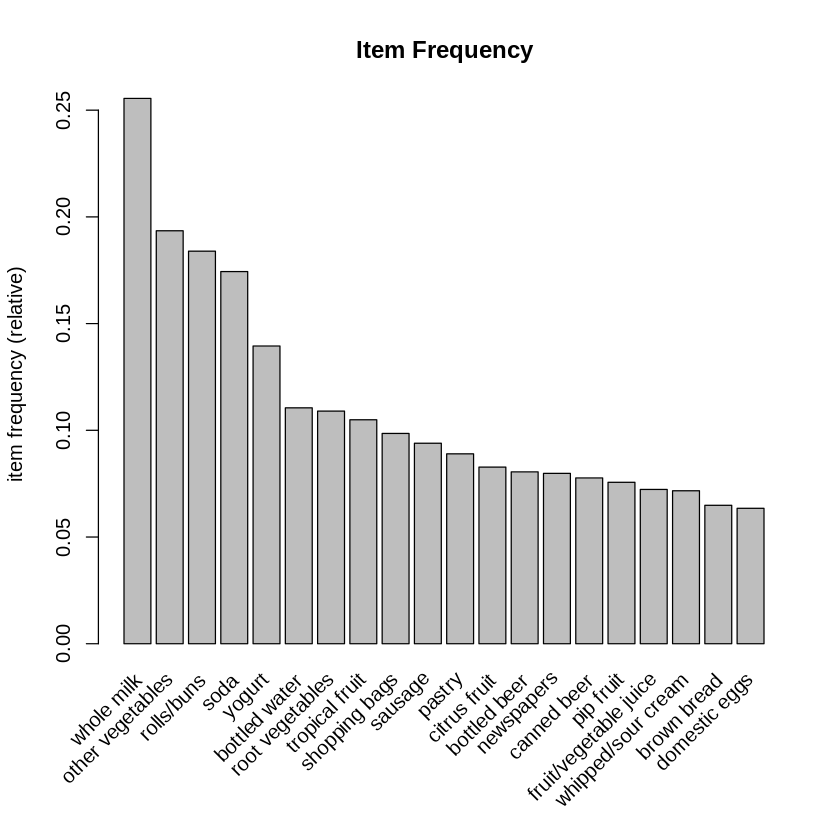

In [21]:
itemFrequencyPlot(Groceries,
                  topN=10,
                  type="relative",
                  main="Item Frequency") #podemos graficar los items frecuentes

## ¿Cómo determinamos las reglas?

In [22]:
rules <- apriori(data = Groceries, #debe ser del tipo "transactions"
                 parameter = list(supp=0.01, conf = 0.08),
                )
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.08    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [472 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 472 rules 

In [23]:
length(rules)


[1] 472

In [25]:
0.01006609/0.02450432

[1] 0.4107884

In [24]:
inspect(rules)

      lhs                           rhs                        support confidence   coverage      lift count
[1]   {}                         => {bottled beer}          0.08052872 0.08052872 1.00000000 1.0000000   792
[2]   {}                         => {pastry}                0.08896797 0.08896797 1.00000000 1.0000000   875
[3]   {}                         => {citrus fruit}          0.08276563 0.08276563 1.00000000 1.0000000   814
[4]   {}                         => {shopping bags}         0.09852567 0.09852567 1.00000000 1.0000000   969
[5]   {}                         => {sausage}               0.09395018 0.09395018 1.00000000 1.0000000   924
[6]   {}                         => {bottled water}         0.11052364 0.11052364 1.00000000 1.0000000  1087
[7]   {}                         => {tropical fruit}        0.10493137 0.10493137 1.00000000 1.0000000  1032
[8]   {}                         => {root vegetables}       0.10899847 0.10899847 1.00000000 1.0000000  1072
[9]   {}           

In [28]:
## Y si queremos buscar con qué combinar un producto determinado, por ejemplo leche
rules <- apriori( data = Groceries,
                  parameter =list (supp=0.02,conf = 0.08, minlen = 2),
                  #appearance = list(default="rhs", lhs ="whole milk"),
                  control = list (verbose=F))

class(rules)
rules

[1] "rules"
attr(,"package")
[1] "arules"

set of 126 rules 

In [29]:
inspect(rules)

      lhs                                    rhs                     support   
[1]   {frozen vegetables}                 => {whole milk}            0.02043721
[2]   {beef}                              => {whole milk}            0.02125064
[3]   {whole milk}                        => {beef}                  0.02125064
[4]   {curd}                              => {whole milk}            0.02613116
[5]   {whole milk}                        => {curd}                  0.02613116
[6]   {pork}                              => {other vegetables}      0.02165735
[7]   {other vegetables}                  => {pork}                  0.02165735
[8]   {pork}                              => {whole milk}            0.02216573
[9]   {whole milk}                        => {pork}                  0.02216573
[10]  {frankfurter}                       => {whole milk}            0.02053889
[11]  {whole milk}                        => {frankfurter}           0.02053889
[12]  {bottled beer}                    

In [34]:
rules_conf <- sort(rules,
                   by="lift",
                   decreasing=T) # ordenando por lift rules.

In [35]:

inspect(rules_conf)

      lhs                                    rhs                     support   
[1]   {other vegetables, whole milk}      => {root vegetables}       0.02318251
[2]   {tropical fruit}                    => {pip fruit}             0.02043721
[3]   {pip fruit}                         => {tropical fruit}        0.02043721
[4]   {root vegetables, whole milk}       => {other vegetables}      0.02318251
[5]   {root vegetables}                   => {other vegetables}      0.04738180
[6]   {other vegetables}                  => {root vegetables}       0.04738180
[7]   {other vegetables, whole milk}      => {yogurt}                0.02226741
[8]   {whipped/sour cream}                => {other vegetables}      0.02887646
[9]   {other vegetables}                  => {whipped/sour cream}    0.02887646
[10]  {yogurt}                            => {whipped/sour cream}    0.02074225
[11]  {whipped/sour cream}                => {yogurt}                0.02074225
[12]  {whole milk, yogurt}              

## Transformación a objetos de clase transaction





In [36]:
 ?transactions

In [37]:
 ## Example 1: creating transactions form a list (each element is a transaction)
     a_list <- list(
           c("a","b","c"),
           c("a","b"),
           c("a","b","d"),
           c("c","e"),
           c("a","b","d","e")
           )

In [38]:
a_list

[[1]]
[1] "a" "b" "c"

[[2]]
[1] "a" "b"

[[3]]
[1] "a" "b" "d"

[[4]]
[1] "c" "e"

[[5]]
[1] "a" "b" "d" "e"

In [39]:
 ## Set transaction names
     names(a_list) <- paste("Tr", c(1:5), sep = "")
     a_list

$Tr1
[1] "a" "b" "c"

$Tr2
[1] "a" "b"

$Tr3
[1] "a" "b" "d"

$Tr4
[1] "c" "e"

$Tr5
[1] "a" "b" "d" "e"

In [40]:
as(a_list, "transactions")


transactions in sparse format with
 5 transactions (rows) and
 5 items (columns)

In [41]:
 trans1 <- transactions(a_list)


In [43]:
trans1
inspect(trans1)


transactions in sparse format with
 5 transactions (rows) and
 5 items (columns)

    items        transactionID
[1] {a, b, c}    Tr1          
[2] {a, b}       Tr2          
[3] {a, b, d}    Tr3          
[4] {c, e}       Tr4          
[5] {a, b, d, e} Tr5          


In [44]:
## Example 2: creating transactions from a 0-1 matrix with 5 transactions (rows) and
     ##            5 items (columns)
     a_matrix <- matrix(
       c(1, 1, 1, 0, 0,
                1, 1, 0, 0, 0,
                1, 1, 0, 1, 0,
                0, 0, 1, 0, 1,
                1, 1, 0, 1, 1), ncol = 5)

     ## Set item names (columns) and transaction labels (rows)
     colnames(a_matrix) <- c("a", "b", "c", "d", "e")
     rownames(a_matrix) <- paste("Tr", c(1:5), sep = "")

     a_matrix


,a,b,c,d,e
Tr1,1,1,1,0,1
Tr2,1,1,1,0,1
Tr3,1,0,0,1,0
Tr4,0,0,1,0,1
Tr5,0,0,0,1,1


In [45]:
     ## Create transactions
     trans2 <- transactions(a_matrix)
     trans2
     inspect(trans2)

transactions in sparse format with
 5 transactions (rows) and
 5 items (columns)

    items        transactionID
[1] {a, b, c, e} Tr1          
[2] {a, b, c, e} Tr2          
[3] {a, d}       Tr3          
[4] {c, e}       Tr4          
[5] {d, e}       Tr5          


In [46]:
## Example 3: creating transactions from data.frame (wide format)
     a_df <- data.frame(
             age   = as.factor(c( 6,   8,   NA, 9,   16)),
             grade = as.factor(c("A", "C", "F", NA, "C")),
       pass  = c(TRUE, TRUE, FALSE, TRUE, TRUE))
     ## Note: factors are translated differently than logicals and NAs are ignored
     a_df


age,grade,pass
<fct>,<fct>,<lgl>
6,A,TRUE
8,C,TRUE
NA,F,FALSE
9,NA,TRUE
16,C,TRUE


In [47]:
     ## Create transactions
     trans3 <- transactions(a_df)
     inspect(trans3)

    items                   transactionID
[1] {age=6, grade=A, pass}  1            
[2] {age=8, grade=C, pass}  2            
[3] {grade=F}               3            
[4] {age=9, pass}           4            
[5] {age=16, grade=C, pass} 5            


In [48]:
## Example 4: creating transactions from a data.frame with
## transaction IDs and items (long format)
     a_df3 <- data.frame(
       TID =  c( 1,   1,   2,   2,   2,   3 ),
       item = c("a", "b", "a", "b", "c", "b")
     )
     a_df3

TID,item
<dbl>,<chr>
1,a
1,b
2,a
2,b
2,c
3,b


In [49]:
trans4 <- transactions(a_df3, format = "long", cols = c("TID", "item"))
trans4
inspect(trans4)

transactions in sparse format with
 3 transactions (rows) and
 3 items (columns)

    items     transactionID
[1] {a, b}    1            
[2] {a, b, c} 2            
[3] {b}       3            


In [50]:
## Example 5: create transactions from a dataset with numeric variables
## using discretization.
data(iris)
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [51]:

irisDisc <- discretizeDF(iris)
head(irisDisc)



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<fct>,<fct>,<fct>,<fct>,<fct>
1,"[4.3,5.4)","[3.2,4.4]","[1,2.63)","[0.1,0.867)",setosa
2,"[4.3,5.4)","[2.9,3.2)","[1,2.63)","[0.1,0.867)",setosa
3,"[4.3,5.4)","[3.2,4.4]","[1,2.63)","[0.1,0.867)",setosa
4,"[4.3,5.4)","[2.9,3.2)","[1,2.63)","[0.1,0.867)",setosa
5,"[4.3,5.4)","[3.2,4.4]","[1,2.63)","[0.1,0.867)",setosa
6,"[5.4,6.3)","[3.2,4.4]","[1,2.63)","[0.1,0.867)",setosa


In [52]:
trans5 <- transactions(irisDisc)
trans5
inspect(head(trans5))

transactions in sparse format with
 150 transactions (rows) and
 15 items (columns)

    items                      transactionID
[1] {Sepal.Length=[4.3,5.4),                
     Sepal.Width=[3.2,4.4],                 
     Petal.Length=[1,2.63),                 
     Petal.Width=[0.1,0.867),               
     Species=setosa}                       1
[2] {Sepal.Length=[4.3,5.4),                
     Sepal.Width=[2.9,3.2),                 
     Petal.Length=[1,2.63),                 
     Petal.Width=[0.1,0.867),               
     Species=setosa}                       2
[3] {Sepal.Length=[4.3,5.4),                
     Sepal.Width=[3.2,4.4],                 
     Petal.Length=[1,2.63),                 
     Petal.Width=[0.1,0.867),               
     Species=setosa}                       3
[4] {Sepal.Length=[4.3,5.4),                
     Sepal.Width=[2.9,3.2),                 
     Petal.Length=[1,2.63),                 
     Petal.Width=[0.1,0.867),               
     Species=setosa}                       4
[5] {Sepal.Length=[4.3,5.4),                
     Sepal